<a href="https://colab.research.google.com/github/dbarrau/TensorFlow_training/blob/main/02_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Exercises

### Create model like the one in playground.tensorflow.org (see instructions in course)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 60)                180       
                                                                 
 dense_13 (Dense)            (None, 6)                 366       
                                                                 
 dense_14 (Dense)            (None, 60)                420       
                                                                 
 dense_15 (Dense)            (None, 1)                 61        
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


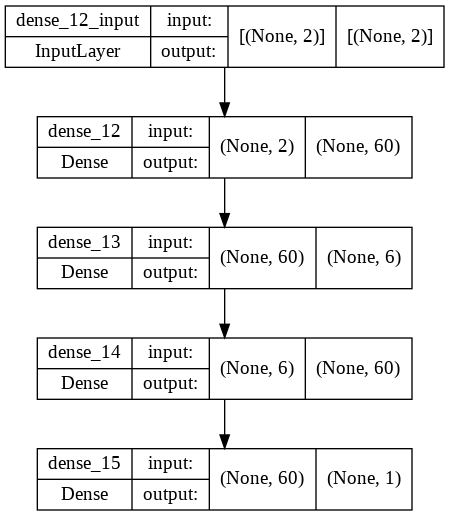

In [ ]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(60, activation="relu",input_shape=[2]),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])


# print model summary
model.summary()

# plot model
tf.keras.utils.plot_model(model, show_shapes=True)

### Create a model with at least 85% accuracy with ``sklearn.make_moons``

In [ ]:
X,y = datasets.make_moons(1000)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

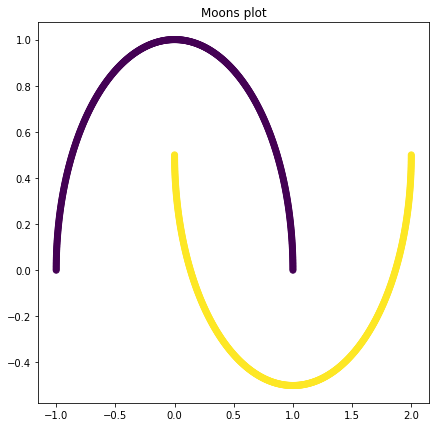

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1], c=y);
plt.title("Moons plot");

### Split data into training and test set

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 18ms/step - loss: 0.6694 - accuracy: 0.6562 - val_loss: 0.6314 - val_accuracy: 0.8313
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.7906 - val_loss: 0.5311 - val_accuracy: 0.8500
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4992 - accuracy: 0.8062 - val_loss: 0.4010 - val_accuracy: 0.8562
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3966 - accuracy: 0.8219 - val_loss: 0.2985 - val_accuracy: 0.8875
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3305 - accuracy: 0.8391 - val_loss: 0.2425 - val_accuracy: 0.9062
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2902 - accuracy: 0.8594 - val_loss: 0.2167 - val_accuracy: 0.9125
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2657 - accuracy: 0.8672 - val_loss: 0.2032 - val_accuracy: 0.9250
Epoch 8/100


### Evaluate model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test = tf.cast(y_test, tf.float32)

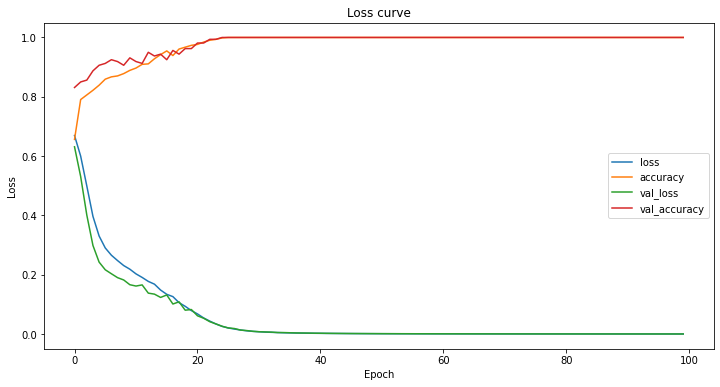

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6), 
                                   title="Loss curve",
                                   xlabel="Epoch",
                                   ylabel="Loss");

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot of confusion_matrix plot
# Source: https://github.com/scikit-learn/scikit-learn/blob/80598905e/sklearn/metrics/_plot/confusion_matrix.py#L462

import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


def plot_confusion_matrix(y_true,y_pred, classes=None, figsize=(10,10),text_size=15):

  y_pred = tf.round(y_pred)
  y_true = tf.cast(y_true, dtype=tf.float32)

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  n_classes

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # We want the diagonal axis in confusion matrices normally to be darker than 
  # false values. 

  # Plot the text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



In [ ]:
y_test[:10],y_pred[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>,
 array([[9.9999225e-01],
        [9.9995649e-01],
        [1.5104136e-04],
        [1.0091836e-05],
        [1.2864382e-06],
        [9.9997914e-01],
        [8.1806420e-06],
        [9.9994183e-01],
        [9.9987543e-01],
        [7.1140530e-05]], dtype=float32))

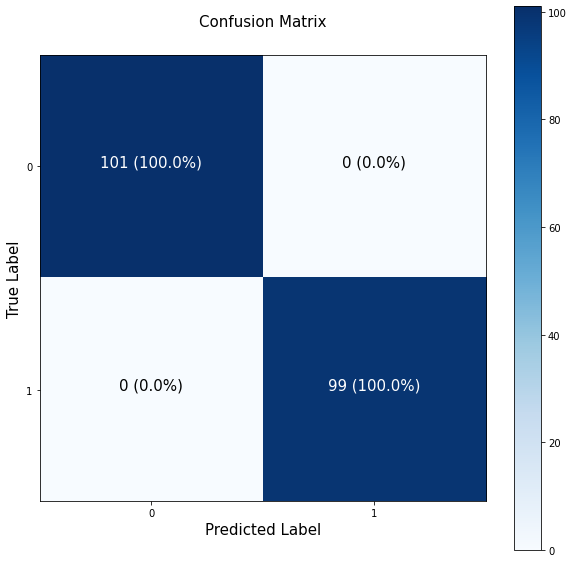

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
# We will plot a function that does the same with our circular toy data
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources.
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of the plot and crate a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (We're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification
doing binary classification


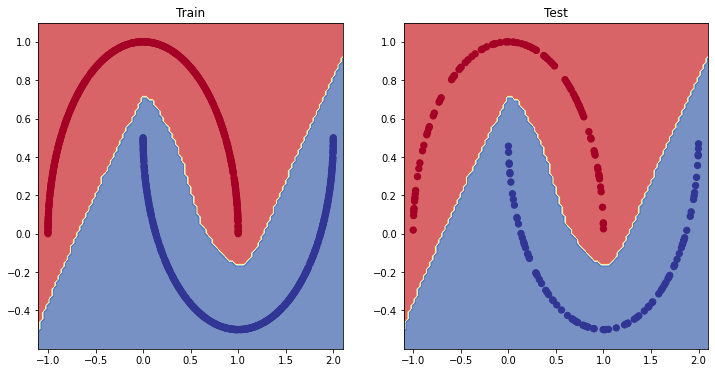

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)

### Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In this process we will:

* Download the data from keras datasets
* Visualize the dataset, understand it
* normalize the data so pixel values are between 0 and 1
* separate data into train / test sets
* Create, compile and fit model
* Evaluate model and visualize results (model boundaries, confusion matrix, and even try some more like F1 score)


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

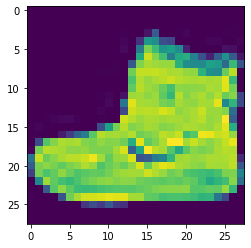

In [ ]:
plt.imshow(X_train[0]);

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# We need to normalize, and therefore we need to see the largest value

tf.reduce_max(X_train).numpy()

255

In [ ]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0



### Create model

**Model characteristics**

We are dealing with a multi-class classification problem. Remember that if we use integers for our categories, our loss will be `tf.keras.Losses.SparseCategoricalCrossentropy()` and if we choose one-hot encoding for the categories, we apply 

* Flatten input layer (784,)
* Non-linearity in hidden layers through activation functions
* Activation function in output layer should be:
  * `tf.keras.losses.SparseCategoricalCrossentropy()` if labels are integers
  * `tf.keras.losses.CategoricalCrossentropy` if labels are one-hot encoded

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_fashion_mnist = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile model
model_fashion_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                            metrics=["accuracy"])

# 3. Fit the model
history = model_fashion_mnist.fit(X_train_norm,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7840 - val_loss: 0.4805 - val_accuracy: 0.8306
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4841 - accuracy: 0.8298 - val_loss: 0.4745 - val_accuracy: 0.8366
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4544 - accuracy: 0.8396 - val_loss: 0.4963 - val_accuracy: 0.8366
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4485 - accuracy: 0.8431 - val_loss: 0.4554 - val_accuracy: 0.8418
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4398 - accuracy: 0.8458 - val_loss: 0.4626 - val_accuracy: 0.8441
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4263 - accuracy: 0.8501 - val_loss: 0.4485 - val_accuracy: 0.8388
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4252 - accuracy: 0.8505 - val_loss: 0.4359 - val_ac

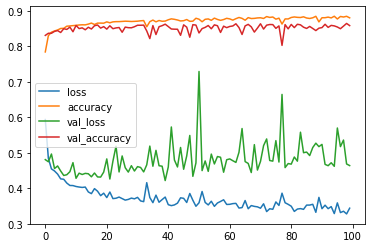

In [ ]:
pd.DataFrame(history.history).plot()

It looks like the model is overfitting! Let's try another one

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
history_1 = model_1.fit(X_train_norm, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6158 - accuracy: 0.7772 - val_loss: 0.4321 - val_accuracy: 0.8418
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4518 - accuracy: 0.8361 - val_loss: 0.4144 - val_accuracy: 0.8470
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4100 - accuracy: 0.8509 - val_loss: 0.3629 - val_accuracy: 0.8673
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3878 - accuracy: 0.8587 - val_loss: 0.3671 - val_accuracy: 0.8653
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3722 - accuracy: 0.8624 - val_loss: 0.3449 - val_accuracy: 0.8773
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3557 - accuracy: 0.8687 - val_loss: 0.3477 - val_accuracy: 0.8730
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3462 - accuracy: 0.8722 - val_loss: 0.3469 - val_ac

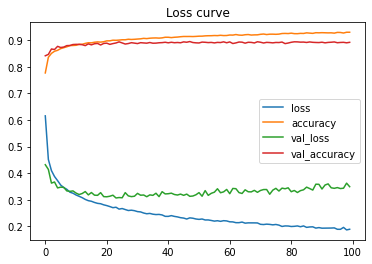

In [ ]:
pd.DataFrame(history_1.history).plot(title="Loss curve");


In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Plot confusion matrix

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot of confusion_matrix plot
# Source: https://github.com/scikit-learn/scikit-learn/blob/80598905e/sklearn/metrics/_plot/confusion_matrix.py#L462

import itertools

def plot_confusion_matrix(y_true,y_pred, classes=None, figsize=(10,10),text_size=15):

  y_pred = tf.round(y_pred)
  y_true = tf.cast(y_true, dtype=tf.float32)

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]
  n_classes

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # We want the diagonal axis in confusion matrices normally to be darker than 
  # false values. 

  # Plot the text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



In [ ]:
y_prob = model_1.predict(X_test_norm)
y_pred = y_prob.argmax(axis=1)

y_test[:10], y_pred[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

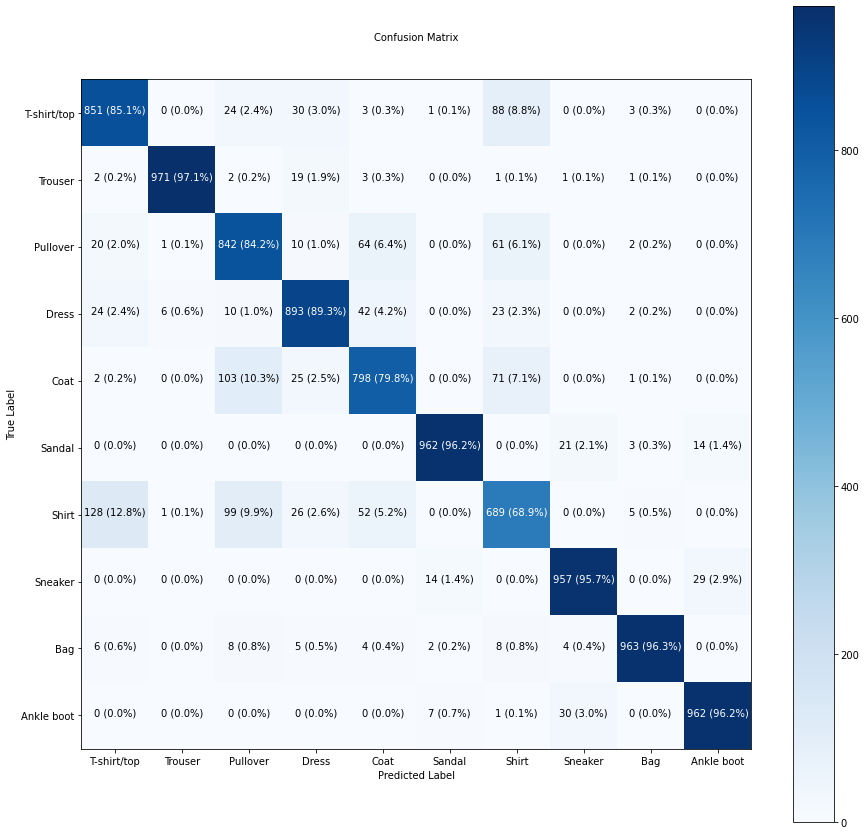

In [ ]:
# Make a prettier confusion matrix
plot_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred, 
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10
                      )

### Scripting the Softmax activation function

In [ ]:
@tf.function
def my_softmax(X):
  return tf.exp(X) / tf.reduce_sum(tf.exp(X))

In [ ]:
X = tf.range(-1000,1000, dtype=tf.float32)/1000
X


<tf.Tensor: shape=(2000,), dtype=float32, numpy=array([-1.   , -0.999, -0.998, ...,  0.997,  0.998,  0.999], dtype=float32)>

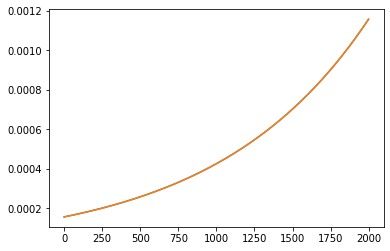

In [ ]:
plt.plot(my_softmax(X));
plt.plot(tf.nn.softmax(X));

> **Note -** Our softmax function exhibits the same behavior of `tf.nn.softmax()`

### 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.


In [ ]:
import random
def plot_random_images(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """
  plt.figure(figsize=(7,7))

  # Set up random integer

  for j in range(4):
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # plot the image
    plt.subplot(2,2,j+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the predictions is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # SEt the color to green or red based on if prediction is right or wrong

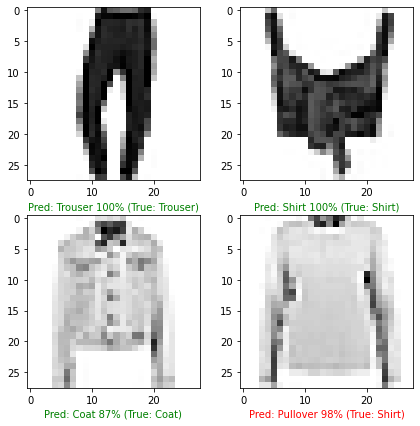

In [ ]:
plot_random_images(model_1, X_test_norm, y_test, class_names)

### 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

**Remember!**

```
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
```

In [ ]:
class_to_display = "T-shirt/top"

In [ ]:
import random
def plot_desired_image(model, images, true_labels, classes, desired_class):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """
  plt.figure(figsize=(7,7))

  # Set up random integer

  for j in range(4):
    
    while True:
      i = random.randint(0, len(images))
      if true_labels[i] == desired_class:
        break

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # plot the image
    plt.subplot(2,2,j+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the predictions is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # SEt the color to green or red based on if prediction is right or wrong




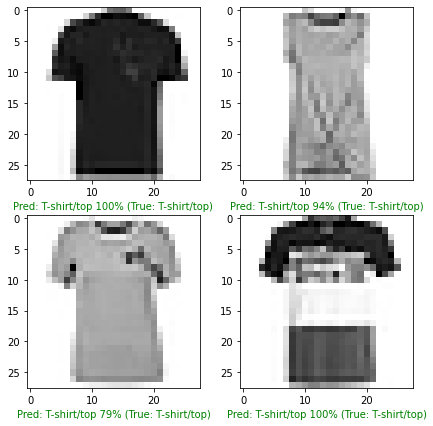

In [ ]:
plot_desired_image(model_1, X_test_norm, y_test, class_names, 0)